   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

<ipython-input-4-7fadcdedc93c>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


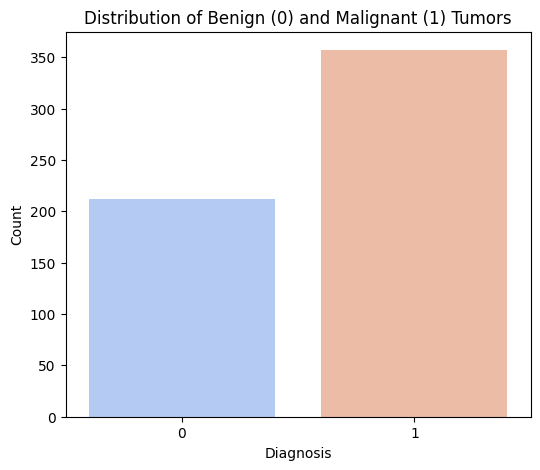

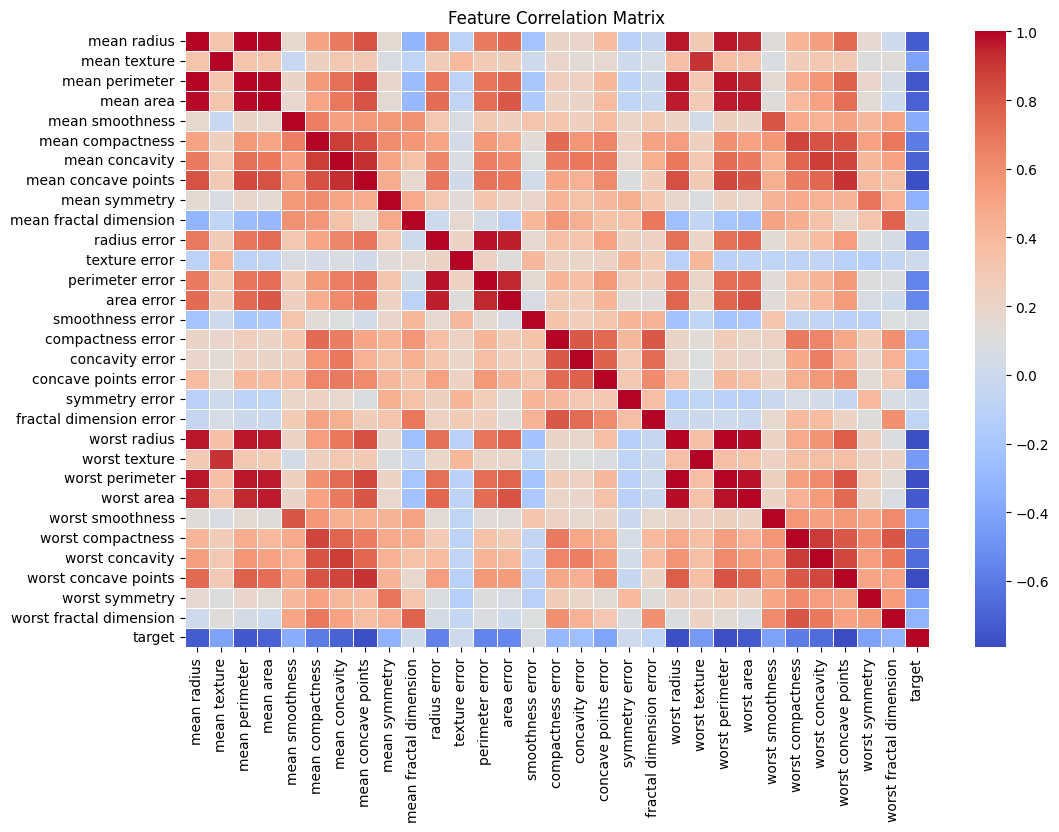

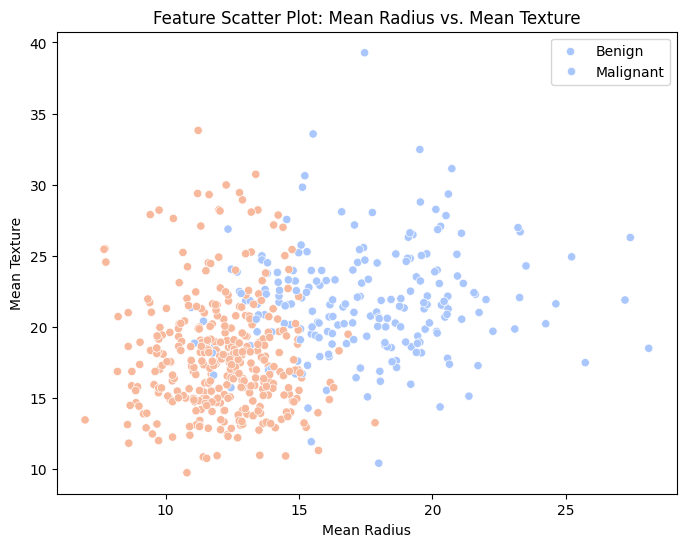

Logistic Regression Accuracy: 0.9737
Random Forest Accuracy: 0.9649
Support Vector Machine Accuracy: 0.9825


<ipython-input-4-7fadcdedc93c>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="coolwarm")


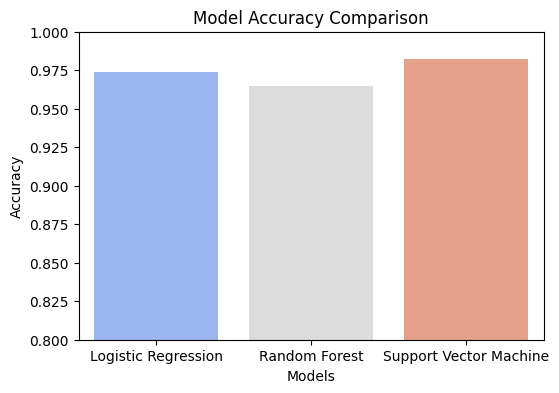


Best Model: Support Vector Machine

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



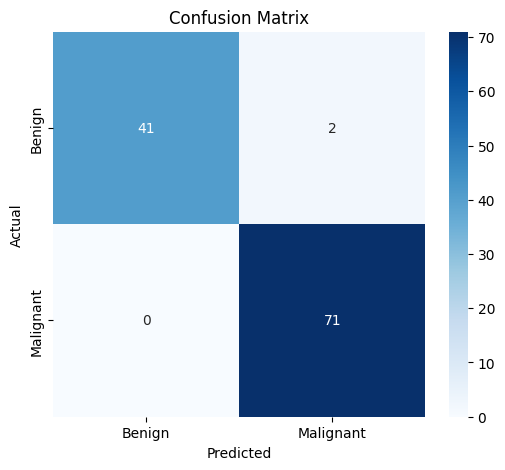

'\nBy: Thabo J. Pilusa\npiluajustin@gmail.com\n@2024\n'

In [4]:
"""
Testing different ML algorithms performance for breast cancer detection

By: Thabo J. Pilusa
"""

# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer  # Sklearn built-in dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Model 1
from sklearn.ensemble import RandomForestClassifier  # Model 2
from sklearn.svm import SVC  # Model 3
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)  # Convert to DataFrame
df['target'] = data.target  # Add the target column (0 = benign, 1 = malignant)

# Step 2: Display the first 5 rows of the dataset
print(df.head())  # Quick check of dataset structure

# Step 3: Preprocessing
# X contains the feature columns, and y contains the target variable (benign/malignant)
X = df.drop(columns=['target'])  # Remove the target column from features
y = df['target']  # Set the target variable only

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features to have zero mean and unit variance
scaler = StandardScaler()  # Instantiate the scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# Step 4: Exploratory Data Analysis (EDA)

# 1. Plot the distribution of benign and malignant cases
plt.figure(figsize=(6, 5))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Benign (0) and Malignant (1) Tumors")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# 2. Correlation Matrix to understand feature relationships
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# 3. Feature Scatter Plot: Mean Radius vs Mean Texture
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["mean radius"], y=df["mean texture"], hue=df["target"], palette="coolwarm")
plt.title("Feature Scatter Plot: Mean Radius vs. Mean Texture")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend(["Benign", "Malignant"])
plt.show()

# Step 5: Train Multiple Models
# Define the models (Logistic Regression, Random Forest, and SVM)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)  # Enable probability prediction for ROC
}

model_accuracies = {}  # Dictionary to store model accuracy

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    model_accuracies[name] = accuracy  # Store accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print model accuracy

# Step 6: Plot the model accuracy for comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="coolwarm")
plt.ylim(0.8, 1.0)  # Adjust y-axis to focus on accuracy range
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# Step 7: Evaluate Best Model
best_model_name = max(model_accuracies, key=model_accuracies.get)  # Get the best model name
best_model_instance = models[best_model_name]  # Get the best model instance

print("\nBest Model:", best_model_name)  # Print the best model name

# Get predictions from the best model
y_pred_best = best_model_instance.predict(X_test_scaled)

# Generate the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




"""
By: Thabo J. Pilusa
piluajustin@gmail.com
@2024
"""
